In [ ]:
import pandas as pd
import torch

In [ ]:
batch_size = 8
learning_rate = 0.01
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
df = pd.read_csv('international_matches.csv')
df.loc[15000]

date                                               2012-06-02
home_team                                               Sudan
away_team                                              Zambia
home_team_continent                                    Africa
away_team_continent                                    Africa
home_team_fifa_rank                                       113
away_team_fifa_rank                                        40
home_team_total_fifa_points                               292
away_team_total_fifa_points                               639
home_team_score                                             0
away_team_score                                             3
tournament                       FIFA World Cup qualification
city                                                 Khartoum
country                                                 Sudan
neutral_location                                        False
shoot_out                                                  No
home_tea

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df.iloc[-10:]

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

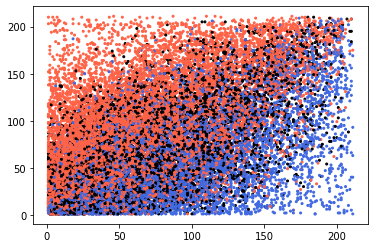

In [ ]:
from matplotlib.colors import ListedColormap
color_map = {
    'Win': 0,
    'Draw': 1,
    'Lose': 2,
}
df['y'] = df.home_team_result.apply(lambda x: color_map[x])
color_map = ListedColormap(['tomato', 'black', 'royalblue'])
plt.scatter(df['home_team_fifa_rank'], df['away_team_fifa_rank'], c=df['y'], cmap=color_map, s=4)

In [ ]:
columns = ['home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_fifa_rank', 'away_team_fifa_rank', 'y']
print(len(df))
clean_df = df[(df.home_team_total_fifa_points != 0) & (df.away_team_total_fifa_points != 0)]
print(len(clean_df))

23921
9594


In [ ]:
clean_df[columns].describe()

,home_team_total_fifa_points,away_team_total_fifa_points,home_team_fifa_rank,away_team_fifa_rank,y
count,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000
mean,804.732541,785.066604,82.584740,86.259433,0.802793
std,487.130535,481.369069,54.900172,54.992580,0.857202
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,355.000000,345.000000,35.000000,40.000000,0.000000
50%,781.000000,743.000000,76.000000,80.000000,1.000000
75%,1233.000000,1201.000000,124.000000,128.000000,2.000000
max,2164.000000,2164.000000,211.000000,211.000000,2.000000


In [ ]:
from sklearn.model_selection import train_test_split
# train_size = int(0.75 * len(clean_df))
train_df, test_df = train_test_split(clean_df[columns], test_size=0.25, shuffle=True)
print(len(train_df))
print(len(test_df))

7195
2399


In [ ]:
train_df.drop('y', axis=1).corr()

,home_team_total_fifa_points,away_team_total_fifa_points,home_team_fifa_rank,away_team_fifa_rank
home_team_total_fifa_points,1.000000,0.803720,-0.580222,-0.289081
away_team_total_fifa_points,0.803720,1.000000,-0.303239,-0.556191
home_team_fifa_rank,-0.580222,-0.303239,1.000000,0.526451
away_team_fifa_rank,-0.289081,-0.556191,0.526451,1.000000


In [ ]:
import seaborn as sns

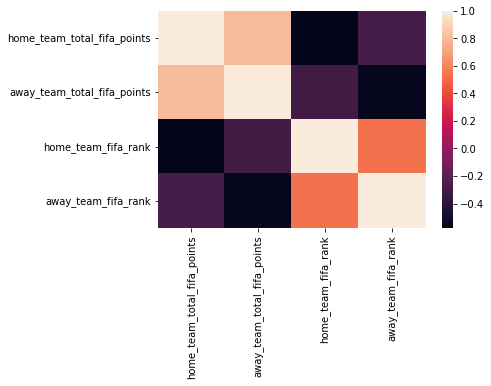

In [ ]:
sns.heatmap(train_df.drop('y', axis=1).corr())

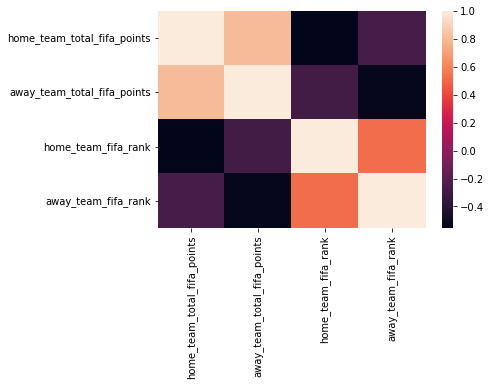

In [ ]:
sns.heatmap(test_df.drop('y', axis=1).corr())

In [ ]:
from torch import nn
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(4, 10)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(10, 20)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(20, 8)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(8, 3)

        self.loss = nn.CrossEntropyLoss(reduction='sum')
    

    def forward(self, xb, yb):
        xb = self.l1(xb)
        xb = self.act1(xb)
        xb = self.l2(xb)
        xb = self.act2(xb)
        xb = self.l3(xb)
        xb = self.act3(xb)
        logits = self.l4(xb)

        loss = self.loss(logits, yb)
        return logits, loss

In [ ]:
import torch
from torch.utils.data import Dataset

class PandasDataset(Dataset):
  def __init__(self, df):
    self.x = df.drop('y', axis=1).values
    self.y = df['y'].values
    self.x = torch.tensor(self.x,dtype=torch.float32)
    self.y = torch.tensor(self.y,dtype=int)
 
  def __len__(self):
    return len(self.x)
   
  def __getitem__(self,idx):
    return self.x[idx], self.y[idx]


In [ ]:
train_dataset = PandasDataset(train_df)
test_dataset = PandasDataset(test_df)
train_dataset[0]

(tensor([ 886., 1022.,   21.,   13.]), tensor(0))

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
def evaluate(model, dataloader):
    total_loss = 0 
    correct_guess = 0
    for xb, yb in tqdm(dataloader):
        xb = xb.to(device)
        yb = yb.to(device)
        with torch.no_grad():
            logits, loss = model(xb, yb)
            preds = logits.argmax(dim=1)
            correct_guess += (preds == yb).sum().item()
            total_loss += loss.item()

    print('val accuracy: ', correct_guess / len(test_dataset))
    print('val loss:', total_loss)

In [ ]:
from tqdm import tqdm
from torch.optim import SGD

model = SimpleModel().to(device)
optimizer = SGD(model.parameters(), lr=learning_rate)

for epoch in range(20):
    print('------------------------------ epoch: ', epoch)
    total_loss = 0
    correct_guess = 0
    for xb, yb in tqdm(train_dataloader):
        xb = xb.to(device)
        yb = yb.to(device)
        logits, loss = model(xb, yb)
        total_loss += loss.item()
        if epoch != 0:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        preds = logits.argmax(dim=1)
        correct_guess += (preds == yb).sum().item()
    
    print('train accuracy: ', correct_guess / len(train_dataset))
    print('train loss:', total_loss)
    evaluate(model, test_dataloader)

------------------------------ epoch:  0


100%|██████████| 900/900 [00:00<00:00, 2900.73it/s]


train accuracy:  0.24781097984711606
train loss: 98266.26263618469


100%|██████████| 300/300 [00:00<00:00, 3543.47it/s]


val accuracy:  0.24885368903709879
val loss: 32900.646911621094
------------------------------ epoch:  1


100%|██████████| 900/900 [00:00<00:00, 1463.44it/s]


train accuracy:  0.48394718554551774
train loss: 540119.4150629044


100%|██████████| 300/300 [00:00<00:00, 3994.40it/s]


val accuracy:  0.47978324301792413
val loss: 2520.071479320526
------------------------------ epoch:  2


100%|██████████| 900/900 [00:00<00:00, 1495.83it/s]


train accuracy:  0.48728283530229327
train loss: 7525.535544157028


100%|██████████| 300/300 [00:00<00:00, 4247.78it/s]


val accuracy:  0.47978324301792413
val loss: 2519.880474090576
------------------------------ epoch:  3


100%|██████████| 900/900 [00:00<00:00, 1548.91it/s]


train accuracy:  0.48728283530229327
train loss: 7528.290009498596


100%|██████████| 300/300 [00:00<00:00, 3734.26it/s]


val accuracy:  0.47978324301792413
val loss: 2520.5351028442383
------------------------------ epoch:  4


100%|██████████| 900/900 [00:00<00:00, 1509.35it/s]


train accuracy:  0.48728283530229327
train loss: 7528.058824539185


100%|██████████| 300/300 [00:00<00:00, 3831.51it/s]


val accuracy:  0.47978324301792413
val loss: 2518.5757446289062
------------------------------ epoch:  5


100%|██████████| 900/900 [00:00<00:00, 1476.79it/s]


train accuracy:  0.48728283530229327
train loss: 7530.107150554657


100%|██████████| 300/300 [00:00<00:00, 4110.56it/s]


val accuracy:  0.47978324301792413
val loss: 2519.926914215088
------------------------------ epoch:  6


100%|██████████| 900/900 [00:00<00:00, 1475.71it/s]


train accuracy:  0.48728283530229327
train loss: 7528.397511005402


100%|██████████| 300/300 [00:00<00:00, 3918.02it/s]


val accuracy:  0.47978324301792413
val loss: 2518.8937559127808
------------------------------ epoch:  7


100%|██████████| 900/900 [00:00<00:00, 1470.26it/s]


train accuracy:  0.48728283530229327
train loss: 7528.5515213012695


100%|██████████| 300/300 [00:00<00:00, 3999.06it/s]


val accuracy:  0.47978324301792413
val loss: 2518.103157520294
------------------------------ epoch:  8


100%|██████████| 900/900 [00:00<00:00, 1529.84it/s]


train accuracy:  0.48728283530229327
train loss: 7523.214648723602


100%|██████████| 300/300 [00:00<00:00, 4008.29it/s]


val accuracy:  0.47978324301792413
val loss: 2523.7090454101562
------------------------------ epoch:  9


100%|██████████| 900/900 [00:00<00:00, 1526.78it/s]


train accuracy:  0.48728283530229327
train loss: 7526.241265535355


100%|██████████| 300/300 [00:00<00:00, 3722.57it/s]


val accuracy:  0.47978324301792413
val loss: 2518.5002908706665
------------------------------ epoch:  10


100%|██████████| 900/900 [00:00<00:00, 1503.79it/s]


train accuracy:  0.48728283530229327
train loss: 7525.848198890686


100%|██████████| 300/300 [00:00<00:00, 3905.00it/s]


val accuracy:  0.47978324301792413
val loss: 2520.673825740814
------------------------------ epoch:  11


100%|██████████| 900/900 [00:00<00:00, 1507.81it/s]


train accuracy:  0.48728283530229327
train loss: 7527.873999595642


100%|██████████| 300/300 [00:00<00:00, 4197.76it/s]


val accuracy:  0.47978324301792413
val loss: 2518.137146472931
------------------------------ epoch:  12


100%|██████████| 900/900 [00:00<00:00, 1520.96it/s]


train accuracy:  0.48728283530229327
train loss: 7528.402320384979


100%|██████████| 300/300 [00:00<00:00, 3547.67it/s]


val accuracy:  0.47978324301792413
val loss: 2520.386703968048
------------------------------ epoch:  13


100%|██████████| 900/900 [00:00<00:00, 1546.73it/s]


train accuracy:  0.48728283530229327
train loss: 7523.241885900497


100%|██████████| 300/300 [00:00<00:00, 3891.88it/s]


val accuracy:  0.47978324301792413
val loss: 2522.893762588501
------------------------------ epoch:  14


100%|██████████| 900/900 [00:00<00:00, 1484.88it/s]


train accuracy:  0.48728283530229327
train loss: 7527.023463964462


100%|██████████| 300/300 [00:00<00:00, 3935.85it/s]


val accuracy:  0.47978324301792413
val loss: 2527.998990535736
------------------------------ epoch:  15


100%|██████████| 900/900 [00:00<00:00, 1554.26it/s]


train accuracy:  0.48728283530229327
train loss: 7525.53472328186


100%|██████████| 300/300 [00:00<00:00, 3548.23it/s]


val accuracy:  0.47978324301792413
val loss: 2522.9127950668335
------------------------------ epoch:  16


100%|██████████| 900/900 [00:00<00:00, 1564.88it/s]


train accuracy:  0.48728283530229327
train loss: 7527.143260002136


100%|██████████| 300/300 [00:00<00:00, 3970.40it/s]


val accuracy:  0.47978324301792413
val loss: 2528.7000045776367
------------------------------ epoch:  17


100%|██████████| 900/900 [00:00<00:00, 1441.56it/s]


train accuracy:  0.48728283530229327
train loss: 7530.4371020793915


100%|██████████| 300/300 [00:00<00:00, 3876.42it/s]


val accuracy:  0.47978324301792413
val loss: 2524.7193751335144
------------------------------ epoch:  18


100%|██████████| 900/900 [00:00<00:00, 1556.39it/s]


train accuracy:  0.48728283530229327
train loss: 7525.707681894302


100%|██████████| 300/300 [00:00<00:00, 3830.46it/s]


val accuracy:  0.47978324301792413
val loss: 2527.8341851234436
------------------------------ epoch:  19


100%|██████████| 900/900 [00:00<00:00, 1593.36it/s]


train accuracy:  0.48728283530229327
train loss: 7528.079185724258


100%|██████████| 300/300 [00:00<00:00, 3779.31it/s]

val accuracy:  0.47978324301792413
val loss: 2520.96422290802


In [ ]:
evaluate(model, test_dataloader)

100%|██████████| 300/300 [00:00<00:00, 3953.41it/s]

val accuracy:  0.47978324301792413
val loss: 2520.96422624588


Accuracy on test set in the simple model is 50.14%

# Better Model

In [ ]:
batch_size = 8

from scipy.stats import zscore

test_df_normalized = test_df[columns].apply(zscore)
# test_df_normalized = test_df[columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
test_df_normalized['y'] = test_df['y']
train_df_normalized = train_df[columns].apply(zscore)
# train_df_normalized = train_df[columns].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))
train_df_normalized['y'] = train_df['y']
# print(train_df_normalized.describe())
# print(test_df_normalized.describe())

train_dataset_normalized = PandasDataset(train_df_normalized)
test_dataset_normalized = PandasDataset(test_df_normalized)
train_dataloader_normalized = DataLoader(train_dataset_normalized, batch_size=batch_size, shuffle=True)
test_dataloader_normalized = DataLoader(test_dataset_normalized, batch_size=batch_size, shuffle=True)

In [ ]:
class BetterModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.act = nn.ReLU()
        self.l1 = nn.Linear(4, 10)
        self.l2 = nn.Linear(10, 20)
        self.l3 = nn.Linear(16, 32)
        self.l4 = nn.Linear(32, 16)
        self.l5 = nn.Linear(20, 8)
        self.l6 = nn.Linear(8, 3)

        # self.dropout = torch.nn.Dropout(0.2)
        self.loss = nn.CrossEntropyLoss()
    

    def forward(self, xb, yb=None):
        xb = self.act(self.l1(xb))
        xb = self.act(self.l2(xb))
        # xb = self.act(self.l3(xb))
        # xb = self.act(self.l4(xb))
        xb = self.act(self.l5(xb))
        # xb = self.dropout(self.act(self.l1(xb)))
        # xb = self.dropout(self.act(self.l2(xb)))
        # xb = self.dropout(self.act(self.l3(xb)))
        # xb = self.dropout(self.act(self.l4(xb)))
        # xb = self.dropout(self.act(self.l5(xb)))
        logits = self.l6(xb)

        if not yb is None:
            loss = self.loss(logits, yb)
        else:
            loss = None
        return logits, loss

In [ ]:
from tqdm import tqdm
from torch.optim import SGD, Adam

learning_rate_better = 0.0001
# learning_rate_better = 0.001

better_model = BetterModel().to(device)
# optimizer = SGD(better_model.parameters(), lr=learning_rate_better)
# optimizer = SGD(better_model.parameters(), lr=learning_rate_better, momentum=0.001, weight_decay=0.001)
# optimizer = SGD(better_model.parameters(), lr=learning_rate_better, momentum=0.0001)
optimizer = Adam(better_model.parameters(), lr=learning_rate_better)

for epoch in range(10):
    print('------------------------------ epoch: ', epoch)
    total_loss = 0
    correct_guess = 0
    for xb, yb in tqdm(train_dataloader_normalized):
        xb = xb.to(device)
        yb = yb.to(device)
        logits, loss = better_model(xb, yb)
        total_loss += loss.item()
        if epoch != 0:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        preds = logits.argmax(dim=1)
        correct_guess += (preds == yb).sum().item()
    
    print('train accuracy: ', correct_guess / len(train_dataset))
    print('train loss:', total_loss)
    evaluate(better_model, test_dataloader_normalized)

------------------------------ epoch:  0


100%|██████████| 900/900 [00:00<00:00, 3426.86it/s]


train accuracy:  0.2878387769284225
train loss: 1009.6890305280685


100%|██████████| 300/300 [00:00<00:00, 3894.06it/s]


val accuracy:  0.28928720300125055
val loss: 336.2668412923813
------------------------------ epoch:  1


100%|██████████| 900/900 [00:01<00:00, 890.83it/s]


train accuracy:  0.4496177901320361
train loss: 980.1199029684067


100%|██████████| 300/300 [00:00<00:00, 3768.13it/s]


val accuracy:  0.527719883284702
val loss: 321.1095497608185
------------------------------ epoch:  2


100%|██████████| 900/900 [00:01<00:00, 896.03it/s]


train accuracy:  0.5332870048644892
train loss: 946.4595751166344


100%|██████████| 300/300 [00:00<00:00, 3804.17it/s]


val accuracy:  0.5377240516882034
val loss: 310.2998242378235
------------------------------ epoch:  3


100%|██████████| 900/900 [00:00<00:00, 901.56it/s]


train accuracy:  0.5609451007644197
train loss: 909.0350719094276


100%|██████████| 300/300 [00:00<00:00, 3780.25it/s]


val accuracy:  0.5623176323468112
val loss: 297.0995802283287
------------------------------ epoch:  4


100%|██████████| 900/900 [00:00<00:00, 903.28it/s]


train accuracy:  0.5747046560111189
train loss: 873.6898456811905


100%|██████████| 300/300 [00:00<00:00, 3857.02it/s]


val accuracy:  0.5723218007503126
val loss: 287.36226123571396
------------------------------ epoch:  5


100%|██████████| 900/900 [00:01<00:00, 867.86it/s]


train accuracy:  0.5745656706045865
train loss: 853.6364393234253


100%|██████████| 300/300 [00:00<00:00, 3507.97it/s]


val accuracy:  0.5702375989995832
val loss: 282.80543476343155
------------------------------ epoch:  6


100%|██████████| 900/900 [00:01<00:00, 868.25it/s]


train accuracy:  0.5742876997915219
train loss: 844.0055594444275


100%|██████████| 300/300 [00:00<00:00, 3264.50it/s]


val accuracy:  0.570654439349729
val loss: 280.5171711742878
------------------------------ epoch:  7


100%|██████████| 900/900 [00:00<00:00, 925.59it/s]


train accuracy:  0.5744266851980542
train loss: 838.9941947758198


100%|██████████| 300/300 [00:00<00:00, 3862.34it/s]


val accuracy:  0.5698207586494373
val loss: 279.2284038364887
------------------------------ epoch:  8


100%|██████████| 900/900 [00:01<00:00, 894.20it/s]


train accuracy:  0.5745656706045865
train loss: 836.0712175369263


100%|██████████| 300/300 [00:00<00:00, 3834.31it/s]


val accuracy:  0.5714881200500208
val loss: 278.38068252801895
------------------------------ epoch:  9


100%|██████████| 900/900 [00:01<00:00, 892.71it/s]


train accuracy:  0.5766504517025712
train loss: 834.3055710196495


100%|██████████| 300/300 [00:00<00:00, 3815.92it/s]

val accuracy:  0.5714881200500208
val loss: 277.8643809854984


In [ ]:
evaluate(better_model, test_dataloader_normalized)

100%|██████████| 300/300 [00:00<00:00, 3715.47it/s]

val accuracy:  0.5714881200500208
val loss: 277.79635006189346


My better model final accuracy is 57%. I tried increasing the depth and using Adam optimizer instead of simple SGD. 

In [ ]:
label_map = {
    0:'Win',
    1:'Draw',
    2:'Lose',
}

iran_wales = torch.tensor([1564.61, 1569.82, 20, 19])
logits, _ = better_model(iran_wales)
print('vs wales: ', label_map[torch.argmax(logits).item()])

iran_usa = torch.tensor([1564.61, 1627.48, 20, 16])
logits, _ = better_model(iran_usa)
print('vs usa: ', label_map[torch.argmax(logits).item()])

iran_uk = torch.tensor([1564.61, 1728.47, 20, 5])
logits, _ = better_model(iran_uk)
print('vs uk: ', label_map[torch.argmax(logits).item()])



# iran_wales = torch.tensor([1569.82, 1564.61, 19, 20,])
# iran_usa = torch.tensor([1627.48, 1564.61, 16, 20])
# iran_uk = torch.tensor([1564.61, 1841.3, 80, 1])


vs wales:  Win
vs usa:  Win
vs uk:  Win


Iran wins all 3 matches! (If it is a home game). Sadly, not iran, and not his opponents play in home :( 